In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import networkx as nx

Step 1: Loading the data and initial examination

In [3]:
df = pd.read_csv("ackley.csv")

In [4]:
# Display the first few rows of the dataframe
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
0,27.038372,-11.473484,-23.266925,-18.226906,-27.500202,24.996366,0.027275,-11.864782,4.071179,5.115790,20.796535
1,-26.398527,2.922328,21.706656,-13.455798,24.849631,7.194752,-10.323394,-30.089887,-16.101829,9.086469,21.011298
2,7.066518,-4.761959,-4.508517,28.733520,-17.303132,-28.496154,22.377133,13.406873,28.460307,-20.842209,21.632668
3,13.571444,-6.686282,1.668713,4.831708,17.612308,-5.726244,29.416320,-20.092855,-16.499782,-6.842937,20.913783
4,19.141402,26.838566,24.300327,-30.016230,30.948698,-12.731471,-14.949860,-5.493433,-24.366039,-2.891657,21.123180


Step 2: Descriptive Statistics
This step is to understand the dataset's basic statistical details like mean, median, standard deviation, etc...

Central Tendency is a measure representing a dataset's center or typical value. 
1: Mean(Average): The sum of values divided by the number of values. It is sensitive to outliers and can be skewed by them. 
2: Median: The middle value when the data are sorted in ascending order. It resists outliers and often represents the data more accurately in skewed data. 
3: Mode: The most frequently occurring values in a dataset. There can be more than one mode or none at all. 

Dispersion (variability) indicates how spread out the values in a dataset. 
1: Range: the difference between the highest and lowest values. It is susceptible to outliers. 
2: Interquartile Range. In between 25% to 75%, it measures the middle 50%
3: Variance: The average of the squared differences from the mean. It shows how much each value in the set varies from the mean.
4: Standard Deviation: the square root of the variance. How much do individual data points deviate from the mean?


In [5]:
# descriptive statistics of the dataset
descriptive_stats = df.describe()
descriptive_stats

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.246737,0.194345,-0.212179,0.091709,-0.113037,-0.289436,-0.072466,0.288168,0.088175,-0.329561,21.093922
std,18.422597,18.459066,18.501473,18.497636,18.353347,18.426648,18.466231,18.475776,18.313254,18.370685,0.443625
min,-31.998957,-31.999446,-31.997370,-31.998921,-31.994315,-31.993703,-31.997380,-31.999925,-31.977135,-31.996274,15.891882
25%,-16.409473,-15.866587,-16.209381,-15.684966,-15.969040,-16.337168,-15.973638,-15.626271,-15.806376,-16.350410,20.890246
50%,-0.274555,0.266674,-0.517385,0.292627,-0.211024,-0.193608,-0.284368,0.404971,0.214544,-0.588815,21.167998
75%,15.604755,16.202207,15.987048,16.046735,15.725329,15.290637,15.792619,16.351869,15.843326,15.616011,21.389358
max,31.998520,31.999030,31.999628,31.999926,31.992917,31.966631,31.997653,31.999816,31.981650,31.996992,22.029354


Count: 10,000 observations for each variable.

Mean: it tells the mean of each variable. 

Standard Deviation: a higher std means more spread in the data. 

Range: is the difference between max and min values. IQR: can be calculated from 25 and 75 percentiles. 

Variance is the square of the standard deviation. 

These measures give a comprehensive understanding of the distribution, center and spread of the data. 

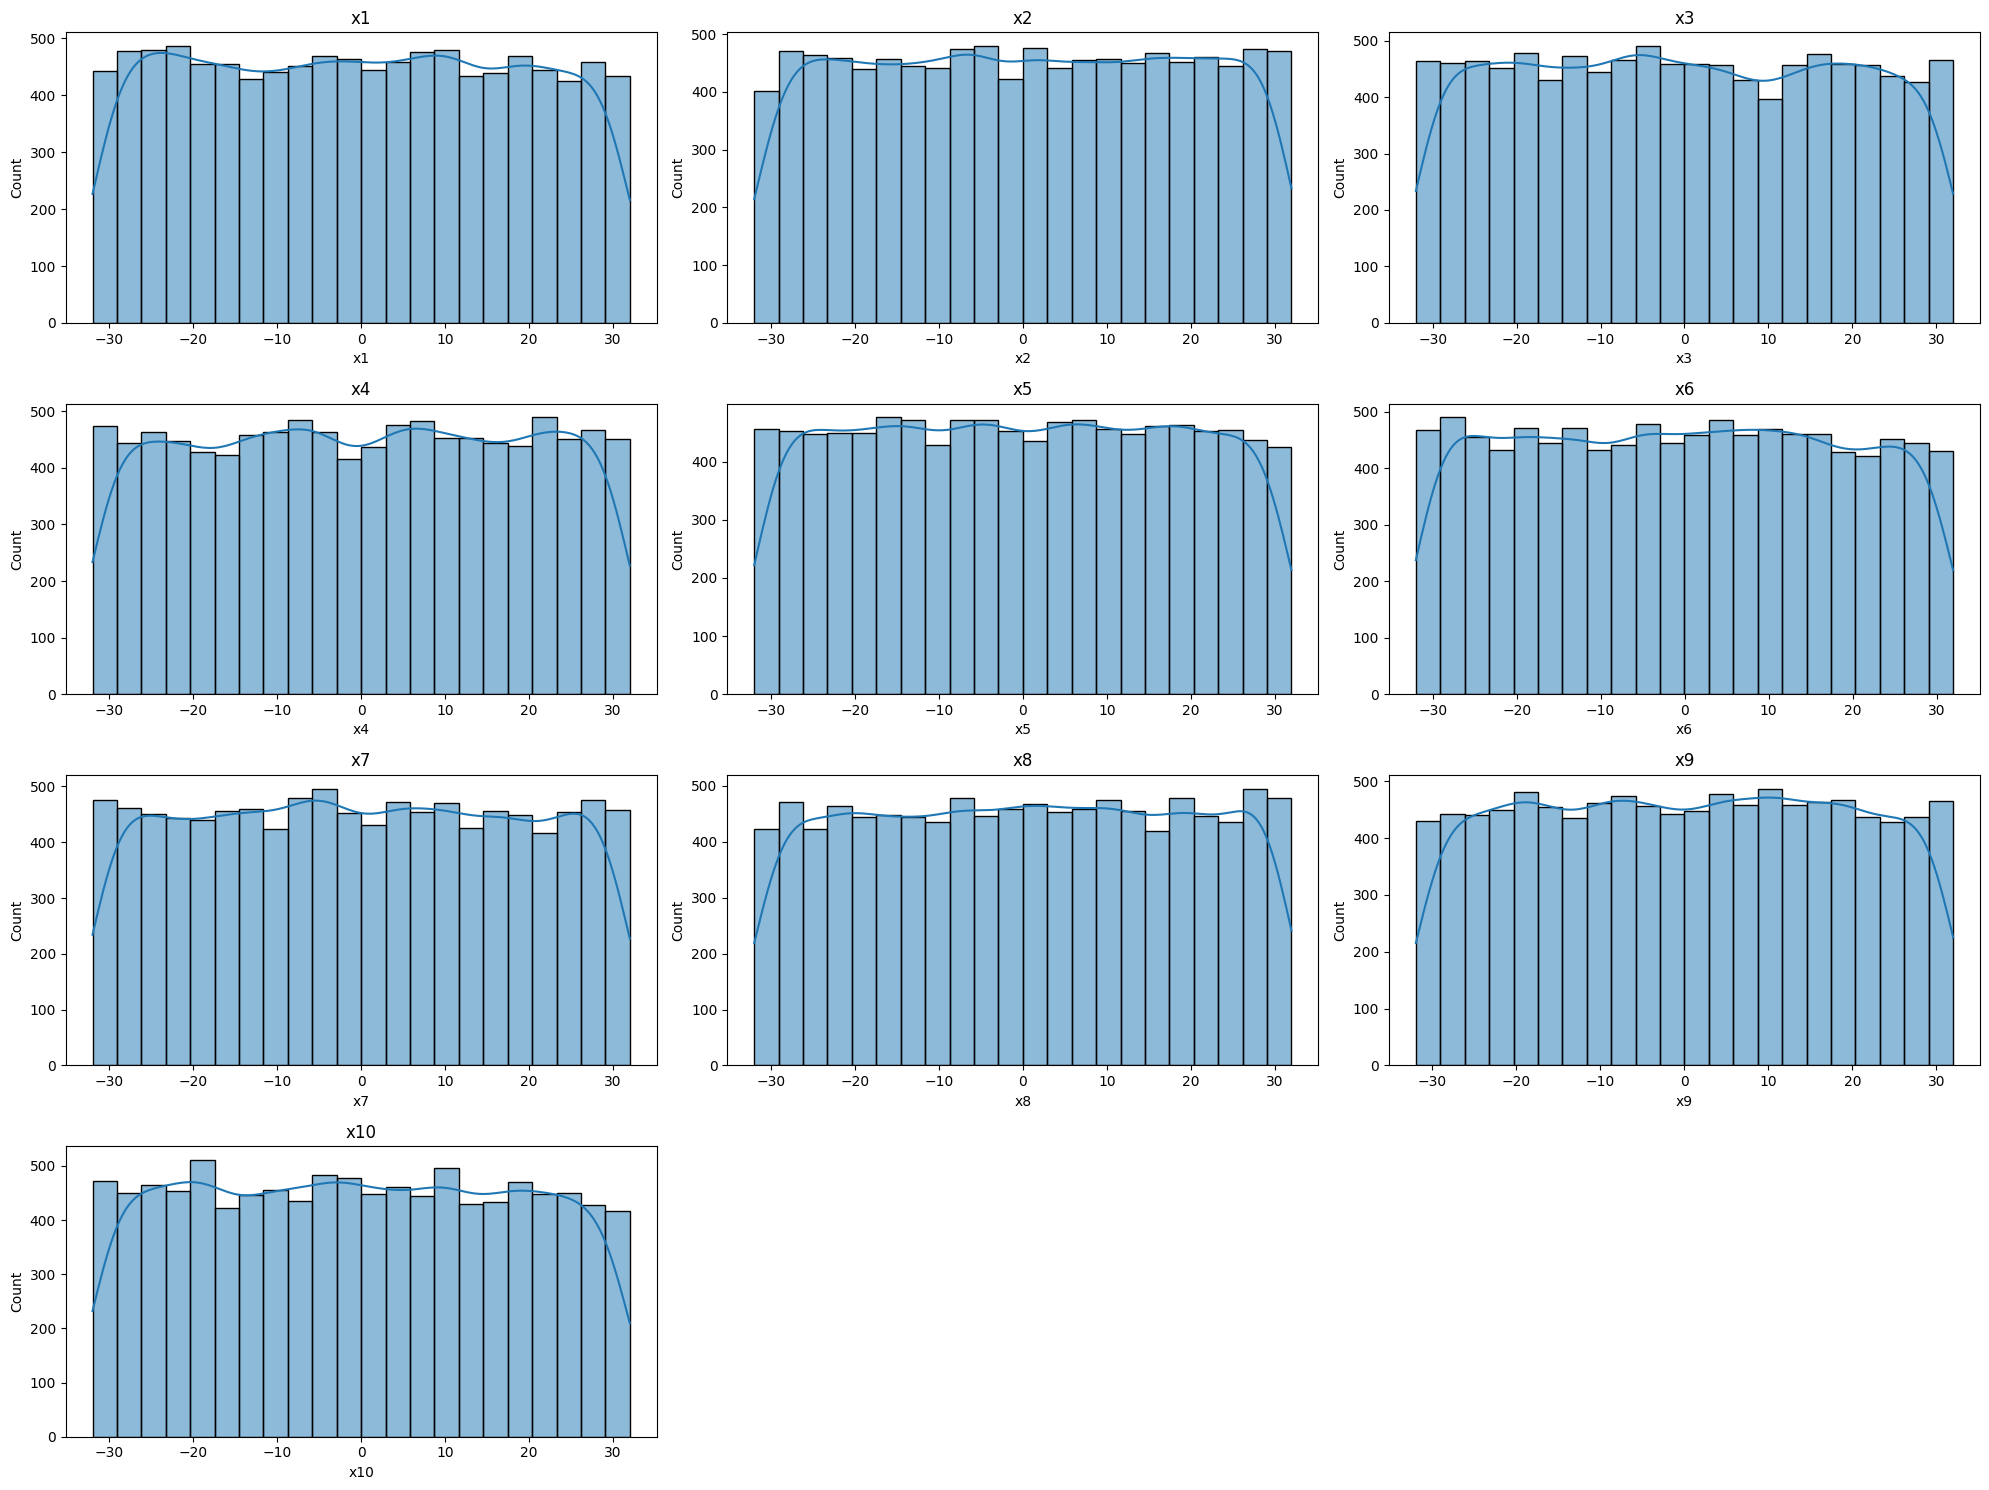

In [6]:
plt.figure(figsize=(20, 15))

# plot histogrames for each feature
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
# Calculating the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

              x1        x2        x3        x4        x5        x6        x7  \
x1      1.000000  0.006328  0.013317  0.003474  0.004215 -0.006732  0.010531   
x2      0.006328  1.000000 -0.013735 -0.000048 -0.004435 -0.006860  0.001238   
x3      0.013317 -0.013735  1.000000  0.000526 -0.002017  0.009061  0.005190   
x4      0.003474 -0.000048  0.000526  1.000000 -0.004372 -0.012073  0.005225   
x5      0.004215 -0.004435 -0.002017 -0.004372  1.000000  0.012417 -0.008565   
x6     -0.006732 -0.006860  0.009061 -0.012073  0.012417  1.000000 -0.003920   
x7      0.010531  0.001238  0.005190  0.005225 -0.008565 -0.003920  1.000000   
x8      0.004697  0.012697  0.012857 -0.011340  0.002382  0.000049  0.007666   
x9     -0.001356 -0.007259 -0.018451 -0.000213 -0.010927 -0.004040  0.012815   
x10     0.013981  0.013448  0.014971 -0.000544  0.017420 -0.023642  0.005806   
target -0.016441  0.002556  0.006403 -0.008828  0.001021 -0.009498  0.011865   

              x8        x9       x10   

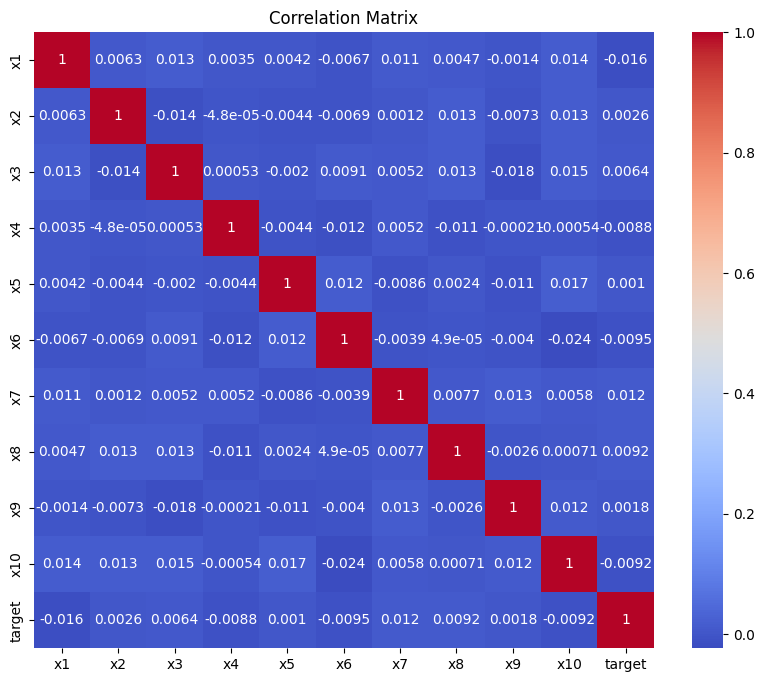

In [8]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Centering the data in Python refers to the process of adjusting the values of each feature in a dataset so that their mean becomes zero. This is typically done by subtracting the mean value of each feature from all the data points for that feature. Centering is a common preprocessing step in many statistical analyses and machine learning algorithms.

Meaning and Purpose of Centering the Data:

Removing Bias: Centering removes the average value from each feature, which can be seen as removing a sort of "bias" from the feature. This makes the features centered around zero.

Facilitating Comparisons: When features have different scales, centering helps to bring them onto a common scale without distorting differences in the range of values or losing information.

Preparation for Scaling: It is often a precursor to further scaling steps, especially when scaling to unit variance (standardization).

Improving Algorithm Performance: Many algorithms, like PCA, linear regression, or gradient descent-based methods, perform better or converge faster when the data is centered.

Meaning and Purpose of Achieving Unit Variance:

Uniform Scaling: By scaling the data to have unit variance, each feature contributes equally to the analysis. 
This is particularly important for methods where the scale of the data is significant, such as distance-based algorithms (like K-means clustering or K-nearest neighbors) and optimization algorithms (like gradient descent).

Improving Algorithm Performance: 

Many machine learning algorithms assume all features are centered around zero and have variance in the same order. Suppose a feature has a variance of orders of magnitude larger than others. In that case, it might dominate the objective function and make the estimator unable to learn from other features correctly.

Normalization: 

Standardizing to unit variance can be seen as normalization, making the data more consistent and more accessible to interpret.


In [9]:
# Separating out the features and the target variable
# Standardization Process:
# Centering the Data: It subtracts the mean value of each feature from the data. After centering, each feature has a mean of 0.
# Scaling to Unit Variance: It divides the centered feature values by their standard deviations. This process changes the variance of each feature to 1.
# X = df.drop('target', axis=1)
# y = df['target']
# # Standardizing the features
# X_std = StandardScaler().fit_transform(X)

X_std = StandardScaler().fit_transform(df)

coverage of All Features: 

If the length of each eigenvector is equal to the number of features in your dataset, 
and the number of such eigenvectors is also equal to the number of features, 
then you can be assured that the eigenvectors collectively cover all features.

Each eigenvector in PCA represents a principal component, which is a linear combination of the original features. 
The coefficients (or loadings) in each eigenvector indicate the contribution of each original feature to that principal component.

A key property of PCA is that the eigenvectors are orthogonal to each other, 
meaning each principal component captures a unique variance direction in the feature space. 
This orthogonality ensures that the principal components collectively span the entire feature space of the original dataset.

In [10]:
# Performing PCA without reducing dimensionality to get all eigenvectors
pca_full = PCA()
pca_full.fit(X_std)

# Extracting the eigenvectors
eigenvectors = pca_full.components_

print("shape")
pca_full.components_.shape

shape


(11, 11)

In [11]:
# Displaying the eigenvectors
print("Eigenvectors:")
print(eigenvectors)

Eigenvectors:
[[-0.44559787 -0.27526025 -0.1769475  -0.1398848  -0.01896932  0.43023622
  -0.30478575 -0.17823521 -0.13273618 -0.58660651  0.0542668 ]
 [ 0.21602069 -0.05288994  0.52609406 -0.24017255  0.39218722  0.34719412
  -0.13662279  0.29894391 -0.47388147  0.08452722 -0.04453746]
 [ 0.21864906 -0.1218893  -0.12260876  0.29750603  0.2114281   0.03770518
  -0.35883184 -0.4728839  -0.07657067  0.16678423 -0.63372692]
 [ 0.1863766  -0.55704632  0.47036881  0.31968209 -0.33652292  0.10596499
   0.38033442 -0.14519358  0.07611311 -0.18413366 -0.04011969]
 [-0.06234914 -0.41509486 -0.06452757 -0.38180737  0.4151736   0.19645548
   0.14026764 -0.09676131  0.57731735  0.31357884  0.04732361]
 [ 0.36615854  0.26052572 -0.21002068 -0.2392239  -0.26178826  0.43973217
   0.20104173  0.26591967  0.24305271 -0.23174881 -0.45924596]
 [ 0.03233164  0.18075506 -0.25115367  0.49435001  0.53043853  0.28321942
   0.47979639 -0.03611028 -0.09470038 -0.1616292   0.17505204]
 [ 0.39639604  0.07545621 -

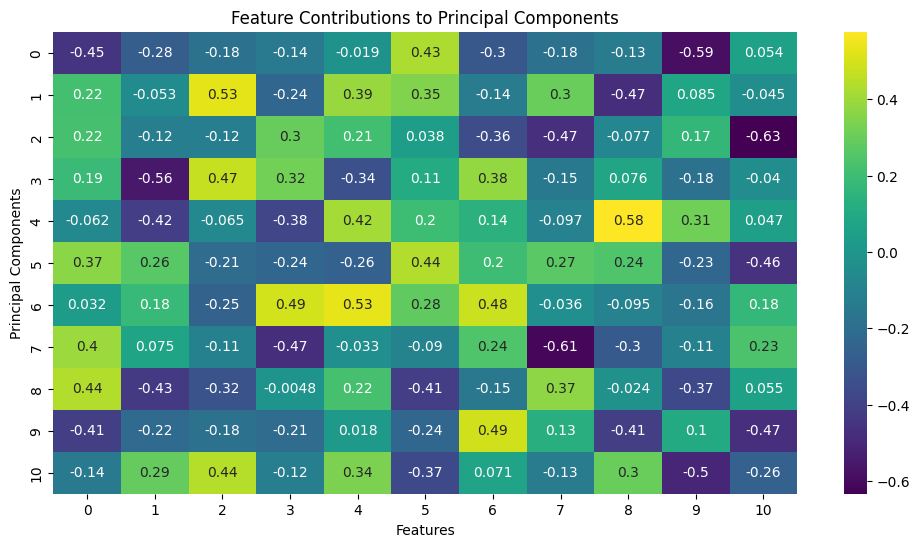

In [12]:
# Plotting the heatmap of feature contributions in each principal component
plt.figure(figsize=(12, 6))
sns.heatmap(eigenvectors, cmap='viridis', annot=True)
plt.title('Feature Contributions to Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

In [13]:
threshold = 0.3
features_above_threshold = []

for vector in eigenvectors:
    features = [index for index, value in enumerate(vector) if abs(value) >= threshold]
    features_above_threshold.append(features)

# Print the indices of features above the threshold for each eigenvector
for i, features in enumerate(features_above_threshold):
    print(f"Eigenvector {i + 1}: Features above threshold {threshold} are at indices {features}")

Eigenvector 1: Features above threshold 0.3 are at indices [0, 5, 6, 9]
Eigenvector 2: Features above threshold 0.3 are at indices [2, 4, 5, 8]
Eigenvector 3: Features above threshold 0.3 are at indices [6, 7, 10]
Eigenvector 4: Features above threshold 0.3 are at indices [1, 2, 3, 4, 6]
Eigenvector 5: Features above threshold 0.3 are at indices [1, 3, 4, 8, 9]
Eigenvector 6: Features above threshold 0.3 are at indices [0, 5, 10]
Eigenvector 7: Features above threshold 0.3 are at indices [3, 4, 6]
Eigenvector 8: Features above threshold 0.3 are at indices [0, 3, 7]
Eigenvector 9: Features above threshold 0.3 are at indices [0, 1, 2, 5, 7, 9]
Eigenvector 10: Features above threshold 0.3 are at indices [0, 6, 8, 10]
Eigenvector 11: Features above threshold 0.3 are at indices [2, 4, 5, 9]


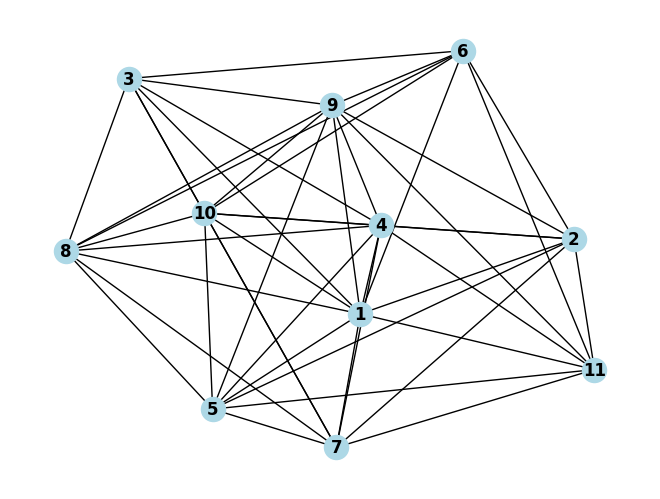

The graph is fully connected: True


In [20]:
# Create a fully connected graph
G = nx.Graph()

# Add nodes for each eigenvector
for i in range(len(eigenvectors)):
    G.add_node(i + 1)

# Add edges based on shared features above the threshold
for i in range(len(features_above_threshold)):
    for j in range(i + 1, len(features_above_threshold)):
        if any(feature in features_above_threshold[j] for feature in features_above_threshold[i]):
            G.add_edge(i + 1, j + 1)

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()

# Check if the graph is fully connected
is_fully_connected = nx.is_connected(G)

print("The graph is fully connected:", is_fully_connected)

In [14]:
# Initialize a list for each feature across eigenvectors
number_of_features = eigenvectors.shape[1]
feature_factor_lists = [[] for _ in range(number_of_features)]

# Loop through eigenvectors and append each feature to the corresponding list
for vector in eigenvectors:
    for i, feature in enumerate(vector):
        feature_factor_lists[i].append(feature)

# Define a threshold for selecting significant factors
threshold = 0.1  # Adjust as needed

# Select factor indices based on the threshold
selected_feature_factor_indices = [
    [index for index, factor in enumerate(feature_list) if abs(factor) >= threshold]
    for feature_list in feature_factor_lists
]

print(selected_feature_factor_indices)

# Create sub-populations based on the selected indices
sub_pops = [eigenvectors[:, indices] for indices in selected_feature_factor_indices if indices]

# Example: print the first sub-population
if sub_pops:
    print(sub_pops[0])

# # New code to find overlapping factors
# # Convert lists to sets for set intersection
# sets_of_factors = [set(feature_factors) for feature_factors in selected_feature_factor_indices]

# # Find common elements across all feature sets
# overlapping_factors = set.intersection(*sets_of_factors)

# print("Overlapping factors:", overlapping_factors)

[[0, 1, 2, 3, 5, 7, 8, 9, 10], [0, 2, 3, 4, 5, 6, 8, 9, 10], [0, 1, 2, 3, 5, 6, 7, 8, 9, 10], [0, 1, 2, 3, 4, 5, 6, 7, 9, 10], [1, 2, 3, 4, 5, 6, 8, 10], [0, 1, 3, 4, 5, 6, 8, 9, 10], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 5, 7, 8, 9, 10], [0, 1, 4, 5, 7, 9, 10], [0, 2, 3, 4, 5, 6, 7, 8, 10], [2, 5, 6, 7, 9, 10]]
[[-0.44559787 -0.27526025 -0.1769475  -0.1398848   0.43023622 -0.17823521
  -0.13273618 -0.58660651  0.0542668 ]
 [ 0.21602069 -0.05288994  0.52609406 -0.24017255  0.34719412  0.29894391
  -0.47388147  0.08452722 -0.04453746]
 [ 0.21864906 -0.1218893  -0.12260876  0.29750603  0.03770518 -0.4728839
  -0.07657067  0.16678423 -0.63372692]
 [ 0.1863766  -0.55704632  0.47036881  0.31968209  0.10596499 -0.14519358
   0.07611311 -0.18413366 -0.04011969]
 [-0.06234914 -0.41509486 -0.06452757 -0.38180737  0.19645548 -0.09676131
   0.57731735  0.31357884  0.04732361]
 [ 0.36615854  0.26052572 -0.21002068 -0.2392239   0.43973217  0.26591967
   0.24305271 -0.23174881 -0.45924596]
 [

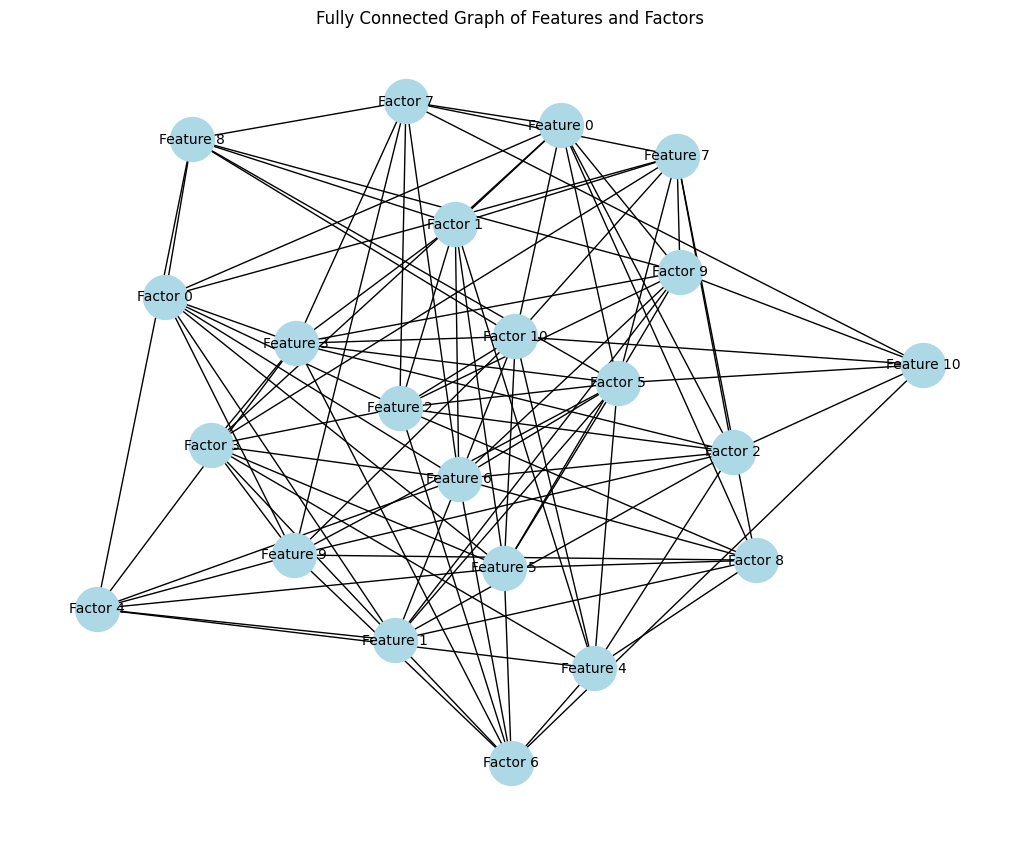

In [15]:
# Create a fully connected graph
G = nx.Graph()

# Add nodes for each feature and factor
for feature_index, factors in enumerate(selected_feature_factor_indices):
    feature_node = f"Feature {feature_index}"
    G.add_node(feature_node)

    for factor in factors:
        factor_node = f"Factor {factor}"
        G.add_node(factor_node)

        # Connect each feature to its factors
        G.add_edge(feature_node, factor_node)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', font_size=10, node_size=1000)
plt.title("Fully Connected Graph of Features and Factors")
plt.show()

In [19]:
print(nx.is_fully_connected(G))

AttributeError: module 'networkx' has no attribute 'is_fully_connected'

What are Eigenvalues in PCA?

In the context of PCA, eigenvalues are scalar values associated with each eigenvector.
The eigenvalue for each principal component (eigenvector) represents the variance ( The average of the squared differences from the mean. 
It shows how much each value in the set varies from the mean.) of the data along that component.
In simple terms, an eigenvalue tells you how much variance its corresponding eigenvector captures.

Importance of Eigenvalues in PCA:

Variance Explanation: Eigenvalues help determine how much of the total variance in the original data is accounted for by each principal component. 
A higher eigenvalue indicates that the principal component captures more variance.

Dimensionality Reduction: When using PCA for dimensionality reduction, eigenvalues decide how many principal components to keep. 

Typically, components with the highest eigenvalues are retained as they represent the most significant features of the data.

Data Interpretation: Analyzing the eigenvalues alongside the eigenvectors can give insights into the data structure. For instance, if several eigenvalues are very small, it might indicate that these dimensions are less informative and could potentially be dropped.

How to Use Eigenvalues in PCA:

Selecting Components: The standard practice is to choose a subset of principal components that capture a substantial portion of the total variance (e.g., 95%). This is done by examining the eigenvalues.
Scree Plot: A scree plot, which plots the eigenvalues in descending order, is often used to assess how many principal components to keep visually. The point where the plot starts to level off (the "elbow") is considered a good cutoff.


In [ ]:
# Extracting the eigenvalues
eigenvalues = pca_full.explained_variance_

# Plotting the eigenvalues (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues, 'o-')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(len(eigenvalues)), [f"PC{i+1}" for i in range(len(eigenvalues))])
plt.show()

Step 1: interpret PCA Results

The magnitude of the coefficients in an eigenvector indicates the importance of the corresponding variables.
Identify Variable Groups: 

Select variables with the highest absolute coefficients (loadings) for each eigenvector. 
These are the variables most strongly associated with that principal component.

In [ ]:
# Extracting the eigenvectors
eigenvectors = pca_full.components_

Step 2: Translate into Factor Architecture

Define Factors Based on PCA Groups: 

Use the groups of variables identified from the PCA as factors for the FEA. Each factor comprises a subset of variables that are optimized together.

Create FactorArchitecture Instance: 
Instantiate the FactorArchitecture class with the defined factors.

In [ ]:
# Analyzing PCA results to define factors
# num_factors = 5  # Define the number of factors
# top_n_variables = 3  # Number of top variables to include in each factor

# factors = [np.argsort(np.abs(component))[-top_n_variables:] for component in pca.components_[:num_factors]]

# print("factors")
# factors

Overlapping Subpopulations: 

In FEAs, the overall population is divided into multiple subpopulations, where each subpopulation is responsible for optimizing a specific subset of the problem's variables. This division is based on the factor architecture of the problem.

Optimization of Subsets of Variables: 

Unlike traditional evolutionary algorithms that optimize all variables simultaneously, FEAs focus on subsets of variables. Each subpopulation optimizes these subsets, potentially leading to a more efficient search and exploration of the solution space.

Factor Architecture: 

A key aspect of FEAs is determining the appropriate factor architecture, which defines how the variables are divided among the subpopulations. 
This architecture is crucial as it influences how well the subpopulations can optimize their respective subsets of variables.


In [ ]:
factors = [np.argsort(np.abs(component))[-1:] for component in pca_full.components_]
factors

In [ ]:
# Performing PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

In [ ]:
# Visualizing the first two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()